# Diagnóstico por Imagem
# Rede Neural Convolucional para detecção de Tumor Cerebral
# Aluna: Dieine Estela Bernieri Schiavon


## Dataset: https://www.kaggle.com/ahmedhamada0/brain-tumor-detection

## Requisitos

In [ ]:
pip install Keras

In [ ]:
pip install tensorflow

## Importações

In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize

from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras

## Informações básicas do dataset

In [2]:
dataset = keras.preprocessing.image_dataset_from_directory( '/Users/bsand/Downloads/BR35H')

for data, labels in dataset:
   print(data.shape)  # Imagem
   print(data.dtype)  # Tipo: float32
   print(labels.shape)  # Rótulo
   print(labels.dtype)  # Tipo: int32

Found 3000 files belonging to 2 classes.
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>
(32, 256, 256, 3)
<dtype: 'float32'>
(32,)
<dtype: 'int32'>

# DataLoader - Leitura das Imagens e Classes

* Download das imagens através do caminho do dataset em disco;
* Criação dos vetores para as imagens x e para as classes y;
* Primeiro for que alterna entre as pastas:0-normal ou 1-com tumor.
* Segundo for percorre as imagens;
* Operação de pré-processamento realizada: redimensionamento das imagens;
* Array das imagens (np.array);
* Adiciona Imagem no vetor;
* Adiciona classes no vetor;
* Normalização: garantindo que cada parâmetro de entrada (pixel) tenha uma distribuição de dados semelhante tornando a convergência mais rápida dutante o treinamento da rede.

In [3]:
brain_tumor = '/Users/bsand/Downloads/BR35H'
x=[] 
y=[] 

for labels in os.listdir(brain_tumor): 
    for file in os.listdir(os.path.join(brain_tumor, labels)): 

        image_path = os.path.join(brain_tumor, labels,  file)
        image= cv2.imread( image_path, cv2.COLOR_BGR2RGB) 
        image = resize(image, (224, 224, 3), mode = 'constant', preserve_range = True) 
        image=np.array(image) 
        x.append(image) 
        y.append(labels) 
        
        #Normalização  
        image /= 255  
        

# Binarização de classes

#Classe Normal em 0 e  Classe com Tumor em 1



In [4]:
target_dict={k: v for v, k in enumerate(np.unique(y))} 
target_val=  [target_dict[y[i]] 
              for i in range(len(y))]

# Treino e Teste

#O conjunto de dados foi dividido em 80% das Imagens para Treino e 20%(test_size) para Teste. 


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, target_val, test_size=0.20, random_state=42) 

In [6]:
classes = np.unique (y_train)
classes_num = len(classes)

print ('Outputs: ', classes_num)
print ('Classes: ', classes)

Outputs:  2
Classes:  [0 1]


# Exemplo de  Imagens de Treino  e Teste

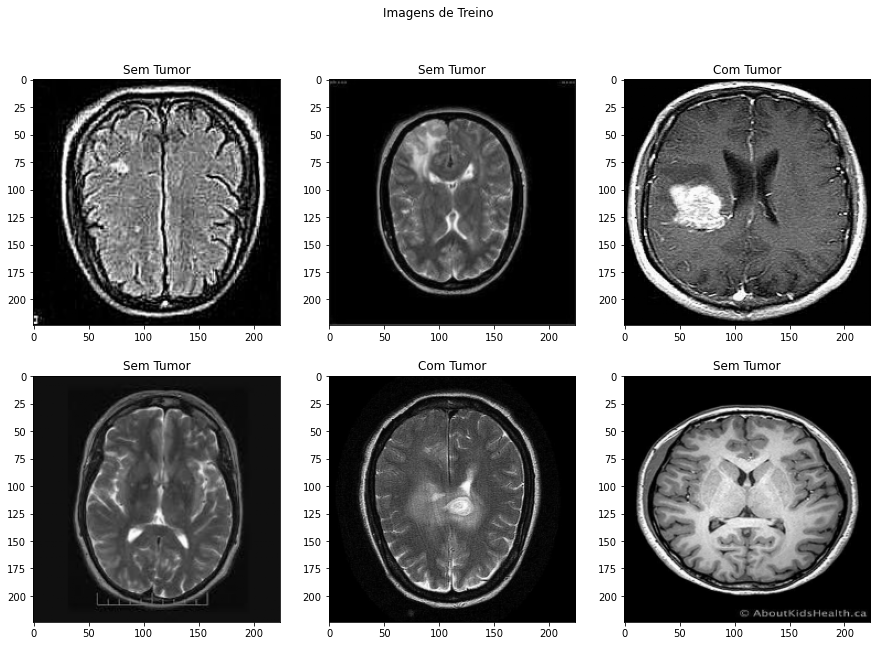

In [7]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Imagens de Treino')
columns = 3
rows = 2

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Sem Tumor')
    else:
        ax.title.set_text('Com Tumor')
    plt.imshow(x_train[i])

plt.show()

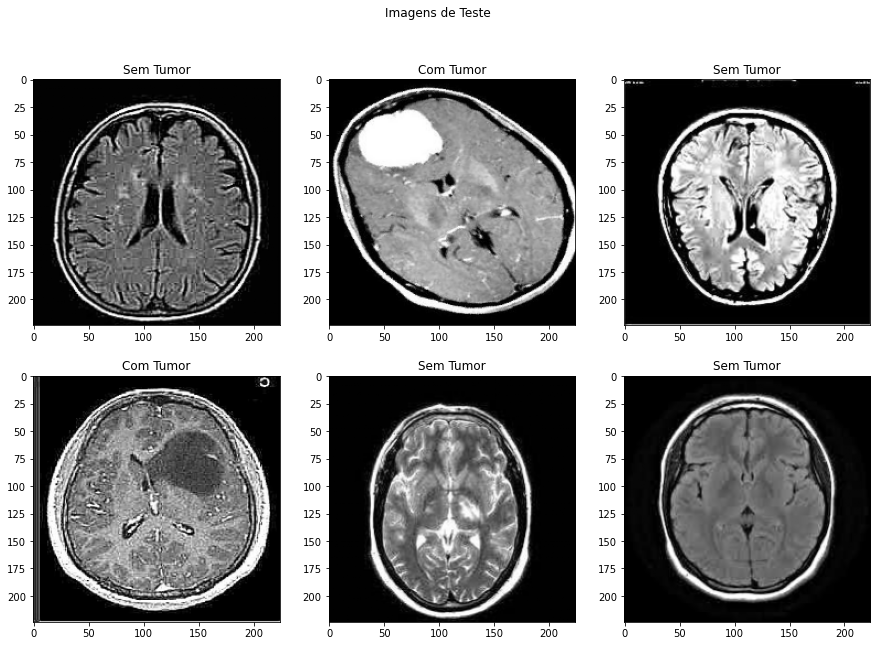

In [8]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Imagens de Teste')
columns = 3
rows = 2

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_test[i] == 0:
        ax.title.set_text('Sem Tumor')
    else:
        ax.title.set_text('Com Tumor')
    plt.imshow(x_test[i])

plt.show()

# Arquitetura da Rede Neural e Definição dos Hiperparâmetros

* Arquitetura baseada na LeNet5, iniciando com a entrada da imagem (input_shape).
* Primeira Camada de Convolução com os Hiperparâmetros definidos(filters=32, kernel_size=3, strides=2, padding=same e activation=relu.
* MaxPooling definido como (2,2)
* Segunda Camada de Convolução com os Hiperparâmetros definidos(filters=64, kernel_size=3, strides=2, padding=same e activation=relu).
* MaxPooling definido como (2,2)
* Criação de vetor de características extraídas pela convolução (Flatten), dropout de 0.4, desconsidera 40% dos neurônios da camada oculta, estratégia amplamente utilizada para evitar overfitting.
* Camada densa = 128 com função de ativação relu para entrada 
* Camada densa (Output) 1 saída [0 ou 1] com ativação sigmoid, bastante utilizada para classificação binária. 
* Otimizador Adam - learning rate por Default=0.001.
* Função de perda (loss) definida para classificação binária.
* Métrica considerada = acurácia.


In [9]:
model = keras.models.Sequential(
        [
            #First Layer /Primeira Camada = Imagem de entrada (224, 224, 3)
            keras.layers.InputLayer(input_shape=(224,224, 3)),
            keras.layers.Conv2D(32, kernel_size =(5,5), strides = (2,2),padding = 'same', activation= 'relu'),
            keras.layers.MaxPooling2D(pool_size =(2,2)),
                    
            #Second Layer / Segunda camada Convolucional
            keras.layers.Conv2D(64, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = 'relu'),
            keras.layers.MaxPooling2D(pool_size =(2,2)),
            
             #Third Layer / Terceira camada Convolucional
            keras.layers.Conv2D(128, kernel_size = (3,3), strides = (2,2), padding = 'same', activation = 'relu'),
            keras.layers.MaxPooling2D(pool_size =(2,2)),
            
            #Flatten / Vetorização
            keras.layers.Flatten(),
            keras.layers.Dropout(0.4),
            
            # Fully Conected / Camada Totalmente Conectada
            keras.layers.Dense(128, activation = 'relu'),   
            keras.layers.Dropout(0.4), 
            #Output layer/ Camada de Saída
            keras.layers.Dense(1, activation = 'sigmoid'),
               
        ])   

#Adam Compiler/ Compilador Adam - learning_rate= 0.001
model.compile(optimizer = 'adam' , loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()
                

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

# Treinamento da rede

Passo 1 -> Transformar as variáveis em vetores

In [10]:
x_test = np.array(x_test) 
x_train = np.array(x_train)
y_test = np.array(y_test)
y_train = np.array(y_train)

In [11]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(2400, 224, 224, 3) (2400,)
(600, 224, 224, 3) (600,)


# Parâmetros
Passo 2 -> Definição das Épocas e do Batch size

In [12]:
history = model.fit(x_train, y_train, epochs=30, batch_size = 32, validation_data=(x_test, y_test)) 

Epoch 1/30
75/75 [==============================] - 12s 160ms/step - loss: 0.5846 - accuracy: 0.6904 - val_loss: 0.4615 - val_accuracy: 0.7783
Epoch 2/30
75/75 [==============================] - 11s 153ms/step - loss: 0.4339 - accuracy: 0.7962 - val_loss: 0.3400 - val_accuracy: 0.8500
Epoch 3/30
75/75 [==============================] - 11s 153ms/step - loss: 0.3360 - accuracy: 0.8592 - val_loss: 0.2485 - val_accuracy: 0.9067
Epoch 4/30
75/75 [==============================] - 11s 152ms/step - loss: 0.2502 - accuracy: 0.8925 - val_loss: 0.1866 - val_accuracy: 0.9417
Epoch 5/30
75/75 [==============================] - 11s 151ms/step - loss: 0.1734 - accuracy: 0.9358 - val_loss: 0.1684 - val_accuracy: 0.9467
Epoch 6/30
75/75 [==============================] - 11s 153ms/step - loss: 0.1319 - accuracy: 0.9554 - val_loss: 0.1363 - val_accuracy: 0.9517
Epoch 7/30
75/75 [==============================] - 11s 151ms/step - loss: 0.1005 - accuracy: 0.9667 - val_loss: 0.1081 - val_accuracy: 0.9683

## Curvas de Aprendizado - Gráficos de acurácia e perda

In [13]:
print ('Perda e Acurácia:')
model.evaluate(x_test, y_test)

Perda e Acurácia:
19/19 [==============================] - 1s 41ms/step - loss: 0.1104 - accuracy: 0.9817


[0.1103639230132103, 0.9816666841506958]

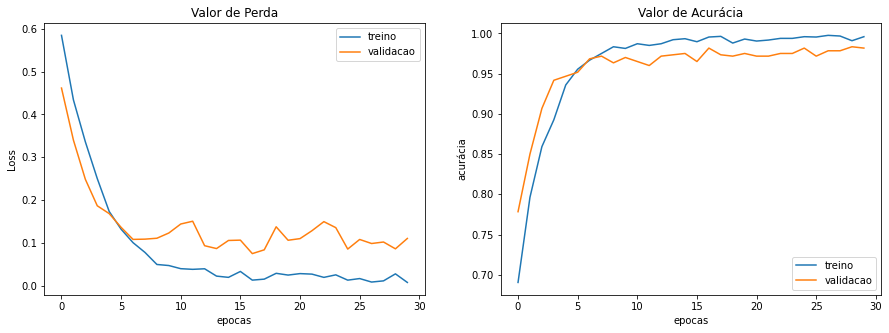

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Valor de Perda')
plt.plot(history.history["loss"], label="treino")
plt.plot(history.history["val_loss"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("Loss")

plt.legend();
plt.subplot(1,2,2)
plt.title('Valor de Acurácia')
plt.plot(history.history["accuracy"], label="treino")
plt.plot(history.history["val_accuracy"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("acurácia")

plt.legend();

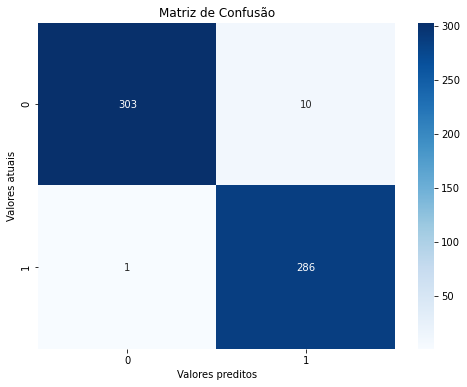

In [15]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

cmat=confusion_matrix(y_test,y_pred,labels=[0,1])
cm_df = pd.DataFrame(cmat)

# Criando um dataframe para a matriz de confusão formatada em array, para que seja fácil de plotar.

cmat_df = pd.DataFrame(cmat,
                     index = ['0','1' ], 
                     columns = ['0','1' ])

#Plotando:
plt.figure(figsize=(8,6))
sns.heatmap(cmat_df, annot=True,fmt="d",cmap=plt.cm.Blues )
plt.title('Matriz de Confusão')
plt.ylabel('Valores atuais')
plt.xlabel('Valores preditos')
plt.show()

In [16]:
tp = cmat[1][1] # True positive
fp = cmat[0][1] # False positive
tn = cmat[0][0] # True negative
fn = cmat[1][0] # False negative

accuracy = ((tp+tn)*100)/np.sum(cmat)
precision = (tp*100)/(tp+fp)
sensibility = (tp*100/(tp+fn))
specificity = (tn*100)/(fp+tn)

print('Métrica de avaliação\t Resultado')
print('Acurácia:..........>',accuracy,"%")
print('Precisão:..........>',precision,"%")
print('Sensibilidade:.....>',sensibility,"%")
print('Especificidade:....>',specificity,"%")

plt.show()

Métrica de avaliação	 Resultado
Acurácia:..........> 98.16666666666667 %
Precisão:..........> 96.62162162162163 %
Sensibilidade:.....> 99.65156794425087 %
Especificidade:....> 96.80511182108626 %


# Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Referências:
* Slides e notebooks das aulas da disciplina de Diagnóstico por Imagem I (RAD0010) 2021/2
* https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6
* https://www.tensorflow.org/guide/keras?hl=pt-br
* https://keras.io/guides/
* Métricas de Avaliação em Machine Learning https://bioinfo.com.br/metricas-de-avaliacao-em-machine-learning-acuracia-sensibilidade-precisao-especificidade-e-f-score/ 